In [2]:
import pandas as pd
import numpy as np
import os, sys
sys.path.insert(0, os.path.abspath('../..'))
import source.data_handling.data_preparation as dp
import source.regression.regression_models as modl
import source.trading_strategies.trading_strategy_helpers as tsh
from source.regression.configs_gw import WITHOUT_LOOKAHEAD, ALL, MINIMAL_SETTING, WITHOUT_LOOKAHEAD_AR, ALL_COVARIATES_NON_AR, ALL_COVARIATES_AR,COMPLETED
data = dp.prepare_data(uselog=True)

/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [ ]:

r2_o,stats, y_true_o, y_pred_o, dates_o,y_lower,y_upper,HA_OLS = modl.tree_ensemble_oos(data, variables=WITHOUT_LOOKAHEAD, start_oos="1965-01-01", ct_cutoff =True, quiet =False, 
)

In [ ]:
from importlib import reload
reload(modl)

In [ ]:

r2_o,stats, y_true_o, y_pred_o, dates_o,y_lower,y_upper,HA_OLS = modl.tree_ensemble_oos(data, variables=WITHOUT_LOOKAHEAD, start_oos="1965-01-01", ct_cutoff =True, quiet =False, 
)

In [ ]:

r2_o,stats, y_true_o, y_pred_o, dates_o,y_lower,y_upper,HA_OLS = modl.pcr_oos(data, variables=WITHOUT_LOOKAHEAD_AR, start_oos="1965-01-01", ct_cutoff =True, quiet =False, model_name="OLS(d/p)",
min_feat_coverage= 0.6
)
modl.plot_oos(
    y_true_o, y_pred_o,HA_OLS, dates=dates_o,
    title=f"Combination OLS OOS (R²_OS={r2_o:.4f})",
    ylabel="Monthly equity premium",
)
fig, ax, perf, (lo, hi) = modl.plot_cum_dsse_with_bootstrap_band(
    y_true_o, y_pred_o, HA_OLS,
    dates=dates_o,
    title=f"Combination OLS OOS (R²_OS={r2_o:.4f})",
    add_band=True,
    B=3000,
    block=12,
    seed=1,
    mode = "tube"
)
tsh.save_oos_results(dates_o, y_true_o, y_pred_o, model_name="Combination_forecast_log")


In [ ]:
from importlib import reload
reload(modl)

In [ ]:

from importlib import reload
reload(tsh)

r2_o,stats, y_true_o, y_pred_o, dates_o,y_lower,y_upper,HA_OLS = modl.ols_combination_oos(data, variables=[
    "vp", "impvar", "vrp", "lzrt", 
    #"ogap", 
    "wtexas", 
    #"sntm", 
    "ndrbl", 
    "skvw", "tail", 
    #"fbm",
    "dtoy", "dtoat", "ygap", "rdsp", 
    #"rsvix", 
    #"tchi", 
    "avgcor", 
    #"shtint",
    "disag", "ntis", "tbl", "d/p", "d/y", 
    "e/p", "d/e", "svar", "lty", "ltr", "tms", "dfy", "dfr", "infl", "b/m"
], start_oos="1965-01-01", ct_cutoff =True, quiet =False, model_name="OLS(d/p)", combo="mean",
)

modl.plot_oos(
    y_true_o, y_pred_o,HA_OLS, dates=dates_o,
    title=f"Combination OLS OOS (R²_OS={r2_o:.4f})",
    ylabel="Monthly equity premium",
)
fig, ax, perf, (lo, hi) = modl.plot_cum_dsse_with_bootstrap_band(
    y_true_o, y_pred_o, HA_OLS,
    dates=dates_o,
    title=f"Combination OLS OOS (R²_OS={r2_o:.4f})",
    add_band=True,
    B=3000,
    block=12,
    seed=1,
)


In [ ]:

from importlib import reload
reload(tsh)

r2_o,stats, y_true_o, y_pred_o, dates_o,y_lower,y_upper,HA_OLS = modl.ols_combination_oos(data, variables=[
    "vp", "impvar", "vrp", "lzrt", 
    #"ogap", 
    "wtexas", 
    #"sntm", 
    "ndrbl", 
    "skvw", "tail", 
    #"fbm",
    "dtoy", "dtoat", "ygap", "rdsp", 
    #"rsvix", 
    #"tchi", 
    "avgcor", 
    #"shtint",
    "disag", "ntis", "tbl", "d/p", "d/y", 
    "e/p", "d/e", "svar", "lty", "ltr", "tms", "dfy", "dfr", "infl", "b/m", "equity_premium"
], start_oos="1965-01-01", ct_cutoff =True, quiet =False, model_name="OLS(d/p)", combo="mean",min_train = 24
)

modl.plot_oos(
    y_true_o, y_pred_o,HA_OLS, dates=dates_o,
    title=f"Combination OLS OOS (R²_OS={r2_o:.4f})",
    ylabel="Monthly equity premium",
)
fig, ax, perf, (lo, hi) = modl.plot_cum_dsse_with_bootstrap_band(
    y_true_o, y_pred_o, HA_OLS,
    dates=dates_o,
    title=f"Combination OLS OOS (R²_OS={r2_o:.4f})",
    add_band=True,
    B=3000,
    block=12,
    seed=1,
)


In [ ]:
from importlib import reload
reload(tsh)

r2_o,stats, y_true_o, y_pred_o, dates_o,y_lower,y_upper,HA_OLS = modl.ols_combination_oos(data, variables=WITHOUT_LOOKAHEAD, start_oos="1965-01-01", ct_cutoff =True, quiet =False, model_name="OLS(d/p)", combo="mean",
)

modl.plot_oos(
    y_true_o, y_pred_o,HA_OLS, dates=dates_o,
    title=f"Combination OLS OOS (R²_OS={r2_o:.4f})",
    ylabel="Monthly equity premium",
)
fig, ax, perf, (lo, hi) = modl.plot_cum_dsse_with_bootstrap_band(
    y_true_o, y_pred_o, HA_OLS,
    dates=dates_o,
    title=f"Combination OLS OOS (R²_OS={r2_o:.4f})",
    add_band=True,
    B=3000,
    block=12,
    seed=1,
)


In [ ]:

r2_o,stats, y_true_o, y_pred_o, dates_o,y_lower,y_upper,HA_OLS = modl.ols_combination_oos(data, variables=WITHOUT_LOOKAHEAD, start_oos="1965-01-01", ct_cutoff =True, quiet =False, model_name="OLS(d/p)", combo="mean",
)

modl.plot_oos(
    y_true_o, y_pred_o,HA_OLS, dates=dates_o,
    title=f"Combination OLS OOS (R²_OS={r2_o:.4f})",
    ylabel="Monthly equity premium",
)
fig, ax, perf, (lo, hi) = modl.plot_cum_dsse_with_bootstrap_band(
    y_true_o, y_pred_o, HA_OLS,
    dates=dates_o,
    title=f"Combination OLS OOS (R²_OS={r2_o:.4f})",
    add_band=True,
    B=3000,
    block=12,
    seed=1,
)


In [ ]:

r2_o,stats, y_true_o, y_pred_o, dates_o,y_lower,y_upper,HA_OLS = modl.ols_combination_oos(data, variables=COMPLETED, start_oos="1965-01-01", ct_cutoff =True, quiet =False, model_name="OLS(d/p)", combo="mean",
)

modl.plot_oos(
    y_true_o, y_pred_o,HA_OLS, dates=dates_o,
    title=f"Combination OLS OOS (R²_OS={r2_o:.4f})",
    ylabel="Monthly equity premium",
)
fig, ax, perf, (lo, hi) = modl.plot_cum_dsse_with_bootstrap_band(
    y_true_o, y_pred_o, HA_OLS,
    dates=dates_o,
    title=f"Combination OLS OOS (R²_OS={r2_o:.4f})",
    add_band=True,
    B=3000,
    block=12,
    seed=1,
)


In [ ]:
# Pick the monthly variables you actually have in `data`:

monthly_vars = [v for v in WITHOUT_LOOKAHEAD if v in data.columns]

ranking = modl.rank_monthly_predictors(
    data,
    monthly_vars=monthly_vars,
    start_date="1927-01-01",
    start_oos="1965-01-01",
    lag=1,
    quiet=True,  # set False to see printed ranking
      ct_cutoff=True,
)


In [ ]:
0.0001+0.0002+0.0007+0.0012+0.0027+0.0029+0.0033+0.0041

In [ ]:
0.0115/0.015199999999999998

In [ ]:
0.0001+0.0002+0.0027+0.0029+0.0033+0.0041

In [ ]:
0.0062/0.0133

In [ ]:
#difference between WITHOUT_LOOKAHEAD and COMPLETED  both are []
difference = list(set(WITHOUT_LOOKAHEAD) - set(COMPLETED))

difference

In [ ]:
WITHOUT_LOOKAHEAD = [
     "impvar", "lzrt", 
    #"ogap", 
    "wtexas", 
    #"sntm",  
    "skvw", "tail", 
    #"fbm",
    "dtoy", "dtoat", "ygap", "rdsp", 
    #"rsvix", 
    #"tchi", 
    "avgcor", 
    #"shtint",
    "disag", "ntis", "tbl", "d/p", "d/y", 
    "e/p", "d/e", "svar", "lty", "ltr", "tms", "dfy", "dfr", "infl", "b/m"
]


In [ ]:
r2_m, stats, y_true_m, y_pred_m, dates_m, y_lower,y_upper,HA_m = modl.chronos2_oos(
    data[data.index>= "1927-01-01"], covariates=WITHOUT_LOOKAHEAD, start_oos="1965-01-01",
    ctx_min=240, ct_cutoff=True, quiet=False, mode = "mean", freq="M",
    ci = 0.5
)

modl.plot_oos(
    y_true_m, y_pred_m, HA_m, dates=dates_m,y_lower=y_lower, y_upper=y_upper,
    title=f"Chronos-2 OOS (R²_OS={r2_m:.4f})",
    ylabel="Monthly equity premium"
)

fig, ax, perf, (lo, hi) = modl.plot_cum_dsse_with_bootstrap_band(
    y_true_m, y_pred_m, HA_m,
    dates=dates_m,
    title=f"Chronos-2 3 variables (R²_OS={r2_m:.4f})",
    add_band=True,
    B=3000,
    block=12,
    seed=1,
    mode = "tube",
)


In [11]:
from importlib import reload
reload(modl)    

<module 'source.regression.regression_models' from '/Users/kilianrunnwerth/Masterarbeit/source/regression/regression_models.py'>

1965-01-01 00:00:00
[AutoARIMA] Searching best order at 1965-01-01...
  best order=(2, 0, 2), seasonal_order=(0, 0, 0, 0)
1965-02-01 00:00:00
1965-03-01 00:00:00
1965-04-01 00:00:00
1965-05-01 00:00:00
1965-06-01 00:00:00
1965-07-01 00:00:00
1965-08-01 00:00:00
1965-09-01 00:00:00
1965-10-01 00:00:00
1965-11-01 00:00:00
1965-12-01 00:00:00
1966-01-01 00:00:00
1966-02-01 00:00:00
1966-03-01 00:00:00
1966-04-01 00:00:00
1966-05-01 00:00:00
1966-06-01 00:00:00
1966-07-01 00:00:00
1966-08-01 00:00:00
1966-09-01 00:00:00
1966-10-01 00:00:00
1966-11-01 00:00:00
1966-12-01 00:00:00
1967-01-01 00:00:00
1967-02-01 00:00:00
1967-03-01 00:00:00
1967-04-01 00:00:00
1967-05-01 00:00:00
1967-06-01 00:00:00
1967-07-01 00:00:00
1967-08-01 00:00:00
1967-09-01 00:00:00
1967-10-01 00:00:00
1967-11-01 00:00:00
1967-12-01 00:00:00
1968-01-01 00:00:00
1968-02-01 00:00:00
1968-03-01 00:00:00
1968-04-01 00:00:00
1968-05-01 00:00:00
1968-06-01 00:00:00
1968-07-01 00:00:00
1968-08-01 00:00:00
1968-09-01 00:00:0

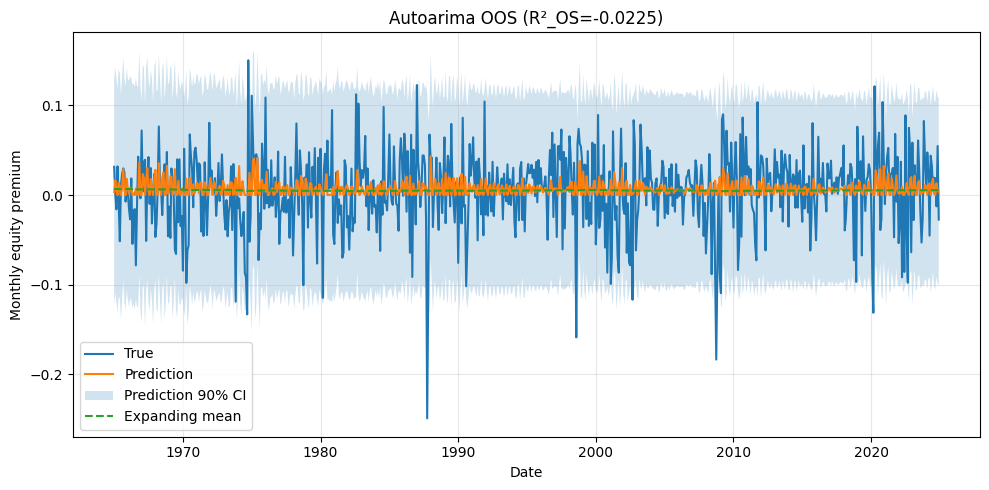

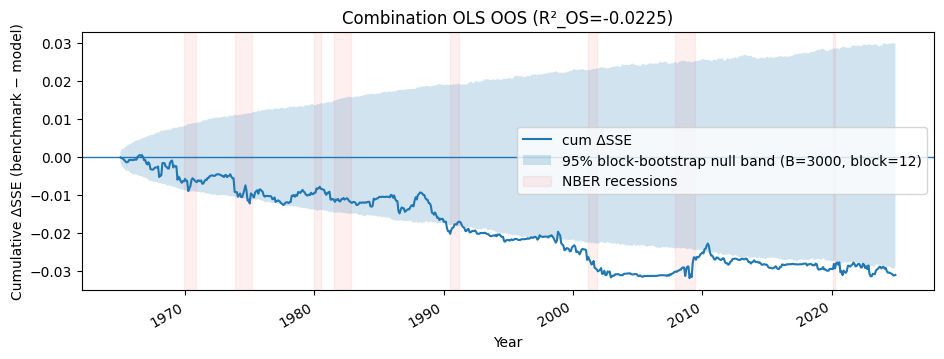

In [12]:
r2_arima, stats_arima, y_true_a, y_pred_a, dates_a, lower_a, upper_a, Ha_arima = modl.autoarima_oos(
    data,
    target_col="equity_premium",
    start_oos="1965-01-01",
    seasonal=False,
    m=1,
    quiet=False,
    ct_cutoff=True,
    mode="mean",
)
modl.plot_oos(
    y_true_a, y_pred_a, Ha_arima, dates=dates_a,
    title=f"Autoarima OOS (R²_OS={r2_arima:.4f})",
    ylabel="Monthly equity premium",
    y_lower = lower_a,
    y_upper = upper_a,
)
fig, ax, perf, (lo, hi) = modl.plot_cum_dsse_with_bootstrap_band(
    y_true_a, y_pred_a, Ha_arima,
    dates=dates_a,
    title=f"Combination OLS OOS (R²_OS={r2_arima:.4f})",
    add_band=True,
    B=3000,
    block=12,
    seed=1,
)



In [ ]:
r2_c, stats_c, y_true_c, y_pred_c, dates_c, y_lower, y_upper, HA_c = modl.chronos_oos(
    data, start_oos="1965-01-01", quiet=True, ct_cutoff=True, freq='M', mode="mean", ci=0.8
)
modl.plot_oos(
    y_true_c, y_pred_c, HA_c, dates=dates_c, y_lower=y_lower, y_upper=y_upper,
    title=f"Chronos-Bolt OOS (R²_OS={r2_c:.4f})",
    ylabel="Monthly equity premium",
)
fig, ax, perf, (lo, hi) = modl.plot_cum_dsse_with_bootstrap_band(
    y_true_c, y_pred_c, HA_c,
    dates=dates_c,
    title=f"Chronos Bolt OOS (R²_OS={r2_c:.4f})",
    add_band=True,
    B=3000,
    block=12,
    seed=1,
)
tsh.save_oos_results(dates_c, y_true_c, y_pred_c, model_name="Chronos_Bolt_forecast")

In [ ]:
r2_m, stats, y_true_m, y_pred_m, dates_m, y_lower,y_upper,HA_m = modl.chronos2_oos(
    data[data.index>= "1927-01-01"], covariates=(), start_oos="1965-01-01",
    ctx_min=240, ct_cutoff=True, quiet=False, mode = "mean", freq="M",
    ci = 0.5
)

modl.plot_oos(
    y_true_m, y_pred_m, HA_m, dates=dates_m,y_lower=y_lower, y_upper=y_upper,
    title=f"Chronos-2 OOS (R²_OS={r2_m:.4f})",
    ylabel="Monthly equity premium"
)

fig, ax, perf, (lo, hi) = modl.plot_cum_dsse_with_bootstrap_band(
    y_true_m, y_pred_m, HA_m,
    dates=dates_m,
    title=f"Chronos-2 3 variables (R²_OS={r2_m:.4f})",
    add_band=True,
    B=3000,
    block=12,
    seed=1,
    mode = "tube",
)


In [ ]:
r2_m, stats, y_true_m, y_pred_m, dates_m, y_lower, y_upper, HA_m = modl.chronos2_oos(
    data, covariates=ALL_COVARIATES_NON_AR, start_oos="1965-01-01",
    ctx_min=256, ct_cutoff=True, quiet=False, mode = "mean", freq="M"
)

modl.plot_oos(
    y_true_m, y_pred_m, HA_m, dates=dates_m, y_lower=y_lower, y_upper=y_upper,
    title=f"Chronos-2 OOS (R²_OS={r2_m:.4f})",
    ylabel="Monthly equity premium"
)

fig, ax, perf, (lo, hi) = modl.plot_cum_dsse_with_bootstrap_band(
    y_true_m, y_pred_m, HA_m,
    dates=dates_m,
    title=f"Chronos-2 all variables OOS (R²_OS={r2_m:.4f})",
    add_band=True,
    B=3000,
    block=12,
    seed=1,
)


In [ ]:
r2_m, stats, y_true_m, y_pred_m, dates_m, y_lower, y_upper, HA_m = modl.chronos2_oos(
    data[data.index >= "1927-01-01"], covariates=WITHOUT_LOOKAHEAD, start_oos="1965-01-01",
    ctx_min=256, ct_cutoff=True, quiet=False, mode = "mean", freq="M"
)

modl.plot_oos(
    y_true_m, y_pred_m, HA_m, dates=dates_m, y_lower=y_lower, y_upper=y_upper,
    title=f"Chronos-2 OOS (R²_OS={r2_m:.4f})",
    ylabel="Monthly equity premium",
    events=False,
)

fig, ax, perf, (lo, hi) = modl.plot_cum_dsse_with_bootstrap_band(
    y_true_m, y_pred_m, HA_m,
    dates=dates_m,
    title=f"Chronos-2 no lockahead variables (R²_OS={r2_m:.4f})",
    add_band=True,
    B=3000,
    block=12,
    seed=1,
    events = False,
    mode = "tube"
)
tsh.save_oos_results(dates_m, y_true_m, y_pred_m, model_name="Chronos_2_forecast_log")
#0.0115  all
# 0.0103 420 
#   0.0034 (±0.0106)          350
# R²_OS=-0.0005 (±0.0107 300
# -0.0072 240
#   -0.0542 30

In [ ]:
r2_m, stats, y_true_m, y_pred_m, dates_m, y_lower, y_upper, HA_m = modl.chronos2_oos(
    data[data.index >= "1927-01-01"], covariates=COMPLETED, start_oos="1965-01-01",
    ctx_min=256, ct_cutoff=True, quiet=False, mode = "mean", freq="M"
)

modl.plot_oos(
    y_true_m, y_pred_m, HA_m, dates=dates_m, y_lower=y_lower, y_upper=y_upper,
    title=f"Chronos-2 OOS (R²_OS={r2_m:.4f})",
    ylabel="Monthly equity premium"
)

fig, ax, perf, (lo, hi) = modl.plot_cum_dsse_with_bootstrap_band(
    y_true_m, y_pred_m, HA_m,
    dates=dates_m,
    title=f"Chronos-2 no lockahead variables (R²_OS={r2_m:.4f})",
    add_band=True,
    B=3000,
    block=12,
    seed=1,
)

In [ ]:
r2_m, stats, y_true_m, y_pred_m, dates_m, y_lower, y_upper, HA_m = modl.chronos2_oos(
    data, covariates=(), start_oos="1965-01-01",
    ctx_min=256, ct_cutoff=True, quiet=False, mode = "mean", freq="M", ci = 0.95,
)

modl.plot_oos(
    y_true_m, y_pred_m, HA_m, dates=dates_m, y_lower=y_lower, y_upper=y_upper,
    title=f"Chronos-2 OOS (R²_OS={r2_m:.4f})",
    ylabel="Monthly equity premium"
)

fig, ax, perf, (lo, hi) = modl.plot_cum_dsse_with_bootstrap_band(
    y_true_m, y_pred_m, HA_m,
    dates=dates_m,
    title=f"Chronos-2 Autoregressive OOS (R²_OS={r2_m:.4f})",
    add_band=True,
    B=3000,
    block=12,
    seed=1,
)
#-0.0193

In [ ]:
r2_m, stats, y_true_m, y_pred_m, dates_m, y_lower, y_upper, HA_m = modl.chronos2_oos(
    data, covariates=(), start_oos="1965-01-01",
    ctx_min=256, ct_cutoff=True, quiet=False, mode = "mean", freq="M", ci = 0.95,context_length =100
)

modl.plot_oos(
    y_true_m, y_pred_m, HA_m, dates=dates_m, y_lower=y_lower, y_upper=y_upper,
    title=f"Chronos-2 OOS (R²_OS={r2_m:.4f})",
    ylabel="Monthly equity premium"
)

fig, ax, perf, (lo, hi) = modl.plot_cum_dsse_with_bootstrap_band(
    y_true_m, y_pred_m, HA_m,
    dates=dates_m,
    title=f"Chronos-2 Autoregressive OOS (R²_OS={r2_m:.4f})",
    add_band=True,
    B=3000,
    block=12,
    seed=1,
)
#-0.0193

In [ ]:
r2_m, stats, y_true_m, y_pred_m, dates_m, y_lower, y_upper, HA_m = modl.chronos2_oos(
    data, covariates=(), start_oos="1965-01-01",
    ctx_min=256, ct_cutoff=True, quiet=False, mode = "mean", freq="M", ci = 0.95,context_length =100
)

modl.plot_oos(
    y_true_m, y_pred_m, HA_m, dates=dates_m, y_lower=y_lower, y_upper=y_upper,
    title=f"Chronos-2 OOS (R²_OS={r2_m:.4f})",
    ylabel="Monthly equity premium"
)

fig, ax, perf, (lo, hi) = modl.plot_cum_dsse_with_bootstrap_band(
    y_true_m, y_pred_m, HA_m,
    dates=dates_m,
    title=f"Chronos-2 Autoregressive OOS (R²_OS={r2_m:.4f})",
    add_band=True,
    B=3000,
    block=12,
    seed=1,
    mode = "tube"
)
#-0.0193

[Moirai2] Using freq='M' (month-end) | ctx=2000 | H=1
1965-01-01 00:00:00
1965-02-01 00:00:00
1965-03-01 00:00:00


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/gluonts/dataset/common.py:254: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ProcessDataEntry(to_offset(freq), one_dim_target, use_timestamp),
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/gluonts/transform/feature.py:161: RuntimeWarning: invalid value encountered in divide
  ar_res = cumsum / indices.astype(float)


1965-04-01 00:00:00
1965-05-01 00:00:00
1965-06-01 00:00:00
1965-07-01 00:00:00
1965-08-01 00:00:00
1965-09-01 00:00:00
1965-10-01 00:00:00
1965-11-01 00:00:00
1965-12-01 00:00:00
1966-01-01 00:00:00
1966-02-01 00:00:00
1966-03-01 00:00:00
1966-04-01 00:00:00
1966-05-01 00:00:00
1966-06-01 00:00:00
1966-07-01 00:00:00
1966-08-01 00:00:00
1966-09-01 00:00:00
1966-10-01 00:00:00
1966-11-01 00:00:00
1966-12-01 00:00:00
1967-01-01 00:00:00
1967-02-01 00:00:00
1967-03-01 00:00:00
1967-04-01 00:00:00
1967-05-01 00:00:00
1967-06-01 00:00:00
1967-07-01 00:00:00
1967-08-01 00:00:00
1967-09-01 00:00:00
1967-10-01 00:00:00
1967-11-01 00:00:00
1967-12-01 00:00:00
1968-01-01 00:00:00
1968-02-01 00:00:00
1968-03-01 00:00:00
1968-04-01 00:00:00
1968-05-01 00:00:00
1968-06-01 00:00:00
1968-07-01 00:00:00
1968-08-01 00:00:00
1968-09-01 00:00:00
1968-10-01 00:00:00
1968-11-01 00:00:00
1968-12-01 00:00:00
1969-01-01 00:00:00
1969-02-01 00:00:00
1969-03-01 00:00:00
1969-04-01 00:00:00
1969-05-01 00:00:00


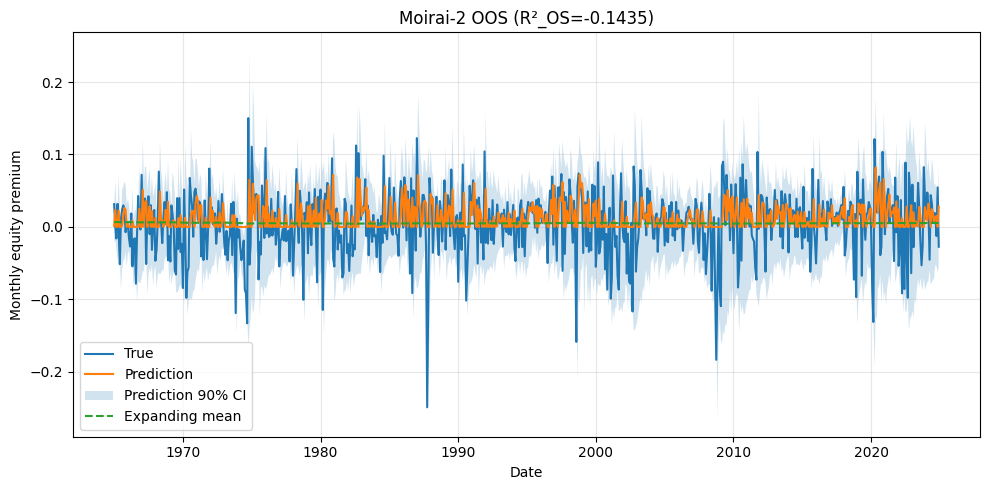

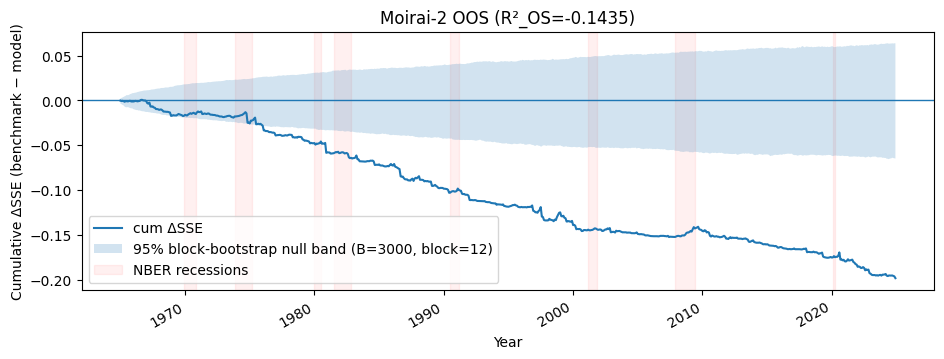

In [7]:
r2_m, stats, y_true_m, y_pred_m, dates_m,y_lower,y_upper, HA_m = modl.moirai2_oos(
    data, covariates=WITHOUT_LOOKAHEAD, start_oos="1965-01-01",
    ctx=2000, device="cpu", ct_cutoff=True, quiet=False, ci=0.95
)

modl.plot_oos(
    y_true_m, y_pred_m, HA_m, dates=dates_m,y_lower=y_lower, y_upper=y_upper,
    title=f"Moirai-2 OOS (R²_OS={r2_m:.4f})",
    ylabel="Monthly equity premium"
)
fig, ax, perf, (lo, hi) = modl.plot_cum_dsse_with_bootstrap_band(
    y_true_m, y_pred_m, HA_m,
    dates=dates_m,
    title=f"Moirai-2 OOS (R²_OS={r2_m:.4f})",
    add_band=True,
    B=3000,
    block=12,
    seed=1,
)


[Moirai2] Using freq='M' (month-end) | ctx=2000 | H=1
1965-01-01 00:00:00
1965-02-01 00:00:00
1965-03-01 00:00:00
1965-04-01 00:00:00
1965-05-01 00:00:00
1965-06-01 00:00:00
1965-07-01 00:00:00
1965-08-01 00:00:00
1965-09-01 00:00:00
1965-10-01 00:00:00


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/gluonts/dataset/common.py:254: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ProcessDataEntry(to_offset(freq), one_dim_target, use_timestamp),
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/gluonts/transform/feature.py:161: RuntimeWarning: invalid value encountered in divide
  ar_res = cumsum / indices.astype(float)


1965-11-01 00:00:00
1965-12-01 00:00:00
1966-01-01 00:00:00
1966-02-01 00:00:00
1966-03-01 00:00:00
1966-04-01 00:00:00
1966-05-01 00:00:00
1966-06-01 00:00:00
1966-07-01 00:00:00
1966-08-01 00:00:00
1966-09-01 00:00:00
1966-10-01 00:00:00
1966-11-01 00:00:00
1966-12-01 00:00:00
1967-01-01 00:00:00
1967-02-01 00:00:00
1967-03-01 00:00:00
1967-04-01 00:00:00
1967-05-01 00:00:00
1967-06-01 00:00:00
1967-07-01 00:00:00
1967-08-01 00:00:00
1967-09-01 00:00:00
1967-10-01 00:00:00
1967-11-01 00:00:00
1967-12-01 00:00:00
1968-01-01 00:00:00
1968-02-01 00:00:00
1968-03-01 00:00:00
1968-04-01 00:00:00
1968-05-01 00:00:00
1968-06-01 00:00:00
1968-07-01 00:00:00
1968-08-01 00:00:00
1968-09-01 00:00:00
1968-10-01 00:00:00
1968-11-01 00:00:00
1968-12-01 00:00:00
1969-01-01 00:00:00
1969-02-01 00:00:00
1969-03-01 00:00:00
1969-04-01 00:00:00
1969-05-01 00:00:00
1969-06-01 00:00:00
1969-07-01 00:00:00
1969-08-01 00:00:00
1969-09-01 00:00:00
1969-10-01 00:00:00
1969-11-01 00:00:00
1969-12-01 00:00:00


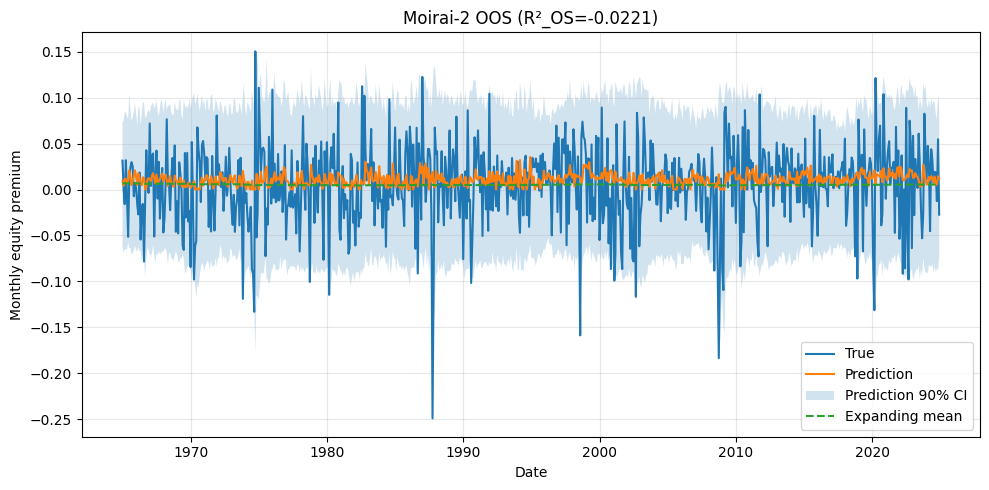

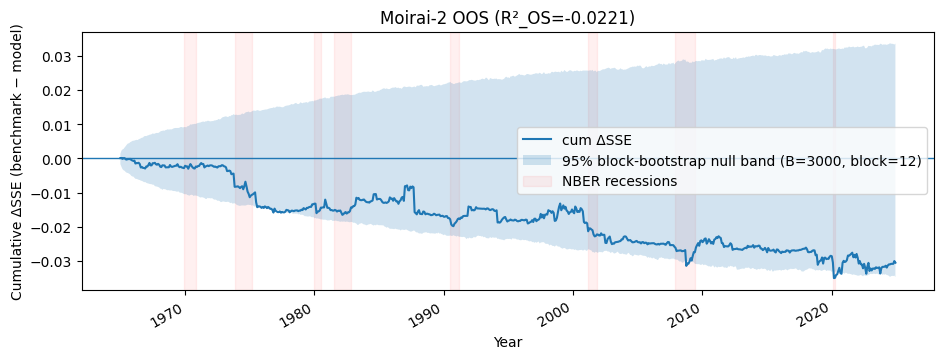

In [6]:
r2_m, stats, y_true_m, y_pred_m, dates_m,y_lower,y_upper, HA_m = modl.moirai2_oos(
    data, covariates=(), start_oos="1965-01-01",
    ctx=2000, device="cpu", ct_cutoff=True, quiet=False, ci=0.95
)

modl.plot_oos(
    y_true_m, y_pred_m, HA_m, dates=dates_m,y_lower=y_lower, y_upper=y_upper,
    title=f"Moirai-2 OOS (R²_OS={r2_m:.4f})",
    ylabel="Monthly equity premium"
)
fig, ax, perf, (lo, hi) = modl.plot_cum_dsse_with_bootstrap_band(
    y_true_m, y_pred_m, HA_m,
    dates=dates_m,
    title=f"Moirai-2 OOS (R²_OS={r2_m:.4f})",
    add_band=True,
    B=3000,
    block=12,
    seed=1,
)


In [ ]:
from importlib import reload
reload(modl)
r2_m, stats, y_true_m, y_pred_m, dates_m,y_lower,y_upper, HA_m = modl.moirai2_oos(
    data, covariates=MINIMAL_SETTING, start_oos="1965-01-01",
    ctx=240, device="cpu", ct_cutoff=True, quiet=True, ci=0.95
)

modl.plot_oos(
    y_true_m, y_pred_m, HA_m, dates=dates_m,y_lower=y_lower, y_upper=y_upper,
    title=f"Moirai-2 OOS (R²_OS={r2_m:.4f})",
    ylabel="Monthly equity premium"
)
fig, ax, perf, (lo, hi) = modl.plot_cum_dsse_with_bootstrap_band(
    y_true_m, y_pred_m, HA_m,
    dates=dates_m,
    title=f"Moirai-2 OOS (R²_OS={r2_m:.4f})",
    add_band=True,
    B=3000,
    block=12,
    seed=1,
    mode = "tube"
)


In [ ]:
r2_m, stats, y_true_m, y_pred_m, dates_m,y_lower,y_upper, HA_m = modl.moirai2_oos(
    data, covariates=minimal_setting, start_oos="1965-01-01",
    ctx=240, device="cpu", ct_cutoff=True, quiet=True, ci=0.95
)

modl.plot_oos(
    y_true_m, y_pred_m, HA_m, dates=dates_m,y_lower=y_lower, y_upper=y_upper,
    title=f"Moirai-2 OOS (R²_OS={r2_m:.4f})",
    ylabel="Monthly equity premium"
)
fig, ax, perf, (lo, hi) = modl.plot_cum_dsse_with_bootstrap_band(
    y_true_m, y_pred_m, HA_m,
    dates=dates_m,
    title=f"Moirai-2 OOS (R²_OS={r2_m:.4f})",
    add_band=True,
    B=3000,
    block=12,
    seed=1,
)


In [ ]:
r2_m, stats, y_true_m, y_pred_m, dates_m,y_lower,y_upper, HA_m = modl.moirai2_oos(
    data, covariates=(), start_oos="1965-01-01",
    ctx=2000, device="cpu", ct_cutoff=True, quiet=True, ci=0.9
)

modl.plot_oos(
    y_true_m, y_pred_m, HA_m, dates=dates_m,y_lower=y_lower, y_upper=y_upper,
    title=f"Moirai-2 OOS (R²_OS={r2_m:.4f})",
    ylabel="Monthly equity premium"
)
fig, ax, perf, (lo, hi) = modl.plot_cum_dsse_with_bootstrap_band(
    y_true_m, y_pred_m, HA_m,
    dates=dates_m,
    title=f"Moirai-2 OOS (R²_OS={r2_m:.4f})",
    add_band=True,
    B=3000,
    block=12,
    seed=1,
)


In [ ]:
r2_m, stats, y_true_m, y_pred_m, dates_m,y_lower,y_upper, HA_m = modl.moirai2_oos(
    data, covariates=all, start_oos="1965-01-01",
    ctx=2000, device="cpu", ct_cutoff=True, quiet=False, ci=0.9
)

modl.plot_oos(
    y_true_m, y_pred_m, HA_m, dates=dates_m,y_lower=y_lower, y_upper=y_upper,
    title=f"Moirai-2 OOS (R²_OS={r2_m:.4f})",
    ylabel="Monthly equity premium"
)
fig, ax, perf, (lo, hi) = modl.plot_cum_dsse_with_bootstrap_band(
    y_true_m, y_pred_m, HA_m,
    dates=dates_m,
    title=f"Moirai-2 OOS (R²_OS={r2_m:.4f})",
    add_band=True,
    B=3000,
    block=12,
    seed=1,
)


In [ ]:


r2_tabpfn, stats, y_true_tabpfn, y_pred_tabpfn, dates_tabpfn, y_lowers_tab, y_upper_tab, HA_Tab = modl.tabpfn_oos_fit_each_step(
    data,
    variables=minimal_setting,
    start_oos="1965-01-01",
    lag=1,
    min_train=120,
    ct_cutoff=True,
    quiet=False,
    model_params='2.5',  # or just omit this argument,
    )

modl.plot_oos(
    y_true_tabpfn, y_pred_tabpfn, HA_Tab, dates=dates_tabpfn,y_lower=y_lowers_tab, y_upper=y_upper_tab,
    title=f"Tabpfn-2.5 OOS (R²_OS={r2_tabpfn:.4f})",
    ylabel="Monthly equity premium"
)
fig, ax, perf, (lo, hi) = modl.plot_cum_dsse_with_bootstrap_band(
    y_true_tabpfn, y_pred_tabpfn, HA_Tab,
    dates=dates_tabpfn,
    title=f"Tabpfn-2.5 OOS (R²_OS={r2_tabpfn:.4f})",
    add_band=True,
    B=3000,
    block=12,
    seed=1,
)

In [ ]:


r2_tabpfn, stats, y_true_tabpfn, y_pred_tabpfn, dates_tabpfn, y_lowers_tab, y_upper_tab, HA_Tab = modl.tabpfn_oos_fit_each_step(
    data,
    variables=without_lookahead_autoregressive,
    start_oos="1965-01-01",
    lag=1,
    min_train=120,
    ct_cutoff=True,
    quiet=False,
    model_params='2.5',  # or just omit this argument,
                            )

modl.plot_oos(
    y_true_tabpfn, y_pred_tabpfn, HA_Tab, dates=dates_tabpfn,y_lower=y_lowers_tab, y_upper=y_upper_tab,
    title=f"Tabpfn-2.5 OOS (R²_OS={r2_tabpfn:.4f})",
    ylabel="Monthly equity premium"
)
fig, ax, perf, (lo, hi) = modl.plot_cum_dsse_with_bootstrap_band(
    y_true_tabpfn, y_pred_tabpfn, HA_Tab,
    dates=dates_tabpfn,
    title=f"Tabpfn-2.5 OOS (R²_OS={r2_tabpfn:.4f})",
    add_band=True,
    B=3000,
    block=12,
    seed=1,
)

In [ ]:


r2_tabpfn, stats, y_true_tabpfn, y_pred_tabpfn, dates_tabpfn, y_lowers_tab, y_upper_tab, HA_Tab = modl.tabpfn_oos_fit_each_step(
    data,
    variables=without_lookahead_autoregressive,
    start_oos="1965-01-01",
    lag=5,
    min_train=120,
    ct_cutoff=True,
    quiet=False,
    model_params='2.5',  # or just omit this argument,
    )

modl.plot_oos(
    y_true_tabpfn, y_pred_tabpfn, HA_Tab, dates=dates_tabpfn,y_lower=y_lowers_tab, y_upper=y_upper_tab,
    title=f"Tabpfn-2.5 OOS (R²_OS={r2_tabpfn:.4f})",
    ylabel="Monthly equity premium"
)
fig, ax, perf, (lo, hi) = modl.plot_cum_dsse_with_bootstrap_band(
    y_true_tabpfn, y_pred_tabpfn, HA_Tab,
    dates=dates_tabpfn,
    title=f"Tabpfn-2.5 OOS (R²_OS={r2_tabpfn:.4f})",
    add_band=True,
    B=3000,
    block=12,
    seed=1,
)



In [ ]:


r2_tabpfn, stats, y_true_tabpfn, y_pred_tabpfn, dates_tabpfn, y_lowers_tab, y_upper_tab, HA_Tab = modl.tabpfn_oos_fit_each_step(
    data,
    variables=without_lookahead_autoregressive,
    start_oos="1965-01-01",
    lag = 3,
    min_train=120,
    ct_cutoff=True,
    quiet=False,
    model_params='2.5',  # or just omit this argument,
    )

modl.plot_oos(
    y_true_tabpfn, y_pred_tabpfn, HA_Tab, dates=dates_tabpfn,y_lower=y_lowers_tab, y_upper=y_upper_tab,
    title=f"Tabpfn-2.5 OOS (R²_OS={r2_tabpfn:.4f})",
    ylabel="Monthly equity premium"
)
fig, ax, perf, (lo, hi) = modl.plot_cum_dsse_with_bootstrap_band(
    y_true_tabpfn, y_pred_tabpfn, HA_Tab,
    dates=dates_tabpfn,
    title=f"Tabpfn-2.5 OOS (R²_OS={r2_tabpfn:.4f})",
    add_band=True,
    B=3000,
    block=12,
    seed=1,
)



In [ ]:


r2_tabpfn, stats, y_true_tabpfn, y_pred_tabpfn, dates_tabpfn, y_lowers_tab, y_upper_tab, HA_Tab = modl.tabpfn_oos_fit_each_step(
    data,
    variables=("equity_premium",),
    start_oos="1965-01-01",
    lag=100,
    min_train=120,
    ct_cutoff=True,
    quiet=False,
    model_params='2.5',  # or just omit this argument,
    )

modl.plot_oos(
    y_true_tabpfn, y_pred_tabpfn, HA_Tab, dates=dates_tabpfn,y_lower=y_lowers_tab, y_upper=y_upper_tab,
    title=f"Tabpfn-2.5 OOS (R²_OS={r2_tabpfn:.4f})",
    ylabel="Monthly equity premium"
)
fig, ax, perf, (lo, hi) = modl.plot_cum_dsse_with_bootstrap_band(
    y_true_tabpfn, y_pred_tabpfn, HA_Tab,
    dates=dates_tabpfn,
    title=f"Tabpfn-2.5 OOS (R²_OS={r2_tabpfn:.4f})",
    add_band=True,
    B=3000,
    block=12,
    seed=1,
)

In [ ]:


r2_tabpfn, stats, y_true_tabpfn, y_pred_tabpfn, dates_tabpfn, y_lowers_tab, y_upper_tab, HA_Tab = modl.tabpfn_oos_fit_each_step(
    data,
    variables=without_lookahead_autoregressive,
    start_oos="1965-01-01",
    lag=8,
    min_train=120,
    ct_cutoff=True,
    quiet=False,
    model_params='2.5',  # or just omit this argument,
    )

modl.plot_oos(
    y_true_tabpfn, y_pred_tabpfn, HA_Tab, dates=dates_tabpfn,y_lower=y_lowers_tab, y_upper=y_upper_tab,
    title=f"Tabpfn-2.5 OOS (R²_OS={r2_tabpfn:.4f})",
    ylabel="Monthly equity premium"
)
fig, ax, perf, (lo, hi) = modl.plot_cum_dsse_with_bootstrap_band(
    y_true_tabpfn, y_pred_tabpfn, HA_Tab,
    dates=dates_tabpfn,
    title=f"Tabpfn-2.5 OOS (R²_OS={r2_tabpfn:.4f})",
    add_band=True,
    B=3000,
    block=12,
    seed=1,
)



In [ ]:
r2_values = []
for i in range(1,20):
    print(i)
    r2_m, stats, y_true_m, y_pred_m, dates_m, y_lower, y_upper, HA_m = modl.chronos2_oos(
        data[data.index >= "1927-01-01"], covariates=without_lookahead_autoregressive, start_oos="2000-01-01",
        ctx_min=256, ct_cutoff=True, quiet=True, mode = "mean", freq="M", bootstrap=(i,12,False,False)
    )


    r2_values.append(r2_m)
sum = 0
for i in r2_values:
    sum += i
avg_r2_1 = sum / len(r2_values)
print("Avg R2 with block size 1:", avg_r2_1)

In [ ]:
r2_values_1 = []
for i in range(1,20):
    print(i)
    r2_m, stats, y_true_m, y_pred_m, dates_m, y_lower, y_upper, HA_m = modl.chronos2_oos(
        data[data.index >= "1927-01-01"], covariates=without_lookahead, start_oos="1965-01-01",
        ctx_min=256, ct_cutoff=True, quiet=True, mode = "mean", freq="M", bootstrap=(i,1,True,True)
    )


    r2_values_1.append(r2_m)

In [ ]:
sum = 0
for i in r2_values_1:
    sum += i
avg_r2_1 = sum / len(r2_values_1)
print("Avg R2 with block size 1:", avg_r2_1)

In [ ]:
sum = 0
for i in r2_values:
    sum += i
avg_r2_1 = sum / len(r2_values)
print("Avg R2 with block size 1:", avg_r2_1)

In [ ]:
sum = 0
for i in r2_values_20:
    sum += i
avg_r2_1 = sum / len(r2_values_20)
print("Avg R2 with block size 1:", avg_r2_1)

In [ ]:
r2_values_120 = []
for i in range(1,20):

    r2_m, stats, y_true_m, y_pred_m, dates_m, y_lower, y_upper, HA_m = modl.chronos2_oos(
        data[(data.index >= "1927-01-01")&(data.index <= "1990-01-01")], covariates=(
        "vp", "impvar", "vrp", "lzrt", 
        #"ogap", 
        "wtexas", 
        #"sntm", 
        "ndrbl", 
        "skvw", "tail", 
        #"fbm",
        "dtoy", "dtoat", "ygap", "rdsp", 
        #"rsvix", 
        #"tchi", 
        "avgcor", 
        #"shtint",
        "disag", "ntis", "tbl", "d/p", "d/y", 
        "e/p", "d/e", "svar", "lty", "ltr", "tms", "dfy", "dfr", "infl", "b/m"
        ), start_oos="1980-01-01",
        ctx_min=256, ct_cutoff=True, quiet=True, mode = "mean", freq="M", bootstrap=(i,120,True,True)
    )


    r2_values_120.append(r2_m)
sum = 0
for i in r2_values_120:
    sum += i
avg_r2_1 = sum / len(r2_values_120)
print("Avg R2 with block size 120:", avg_r2_1)

In [ ]:
r2_values_120_last_changed = []
for i in range(1,20):

    r2_m, stats, y_true_m, y_pred_m, dates_m, y_lower, y_upper, HA_m = modl.chronos2_oos(
        data[(data.index >= "1927-01-01")&(data.index <= "1990-01-01")], covariates=(
        "vp", "impvar", "vrp", "lzrt", 
        #"ogap", 
        "wtexas", 
        #"sntm", 
        "ndrbl", 
        "skvw", "tail", 
        #"fbm",
        "dtoy", "dtoat", "ygap", "rdsp", 
        #"rsvix", 
        #"tchi", 
        "avgcor", 
        #"shtint",
        "disag", "ntis", "tbl", "d/p", "d/y", 
        "e/p", "d/e", "svar", "lty", "ltr", "tms", "dfy", "dfr", "infl", "b/m"
        ), start_oos="1980-01-01",
        ctx_min=256, ct_cutoff=True, quiet=True, mode = "mean", freq="M", bootstrap=(i,120,False,False)
    )


    r2_values_120_last_changed.append(r2_m)
sum = 0
for i in r2_values_120_last_changed:
    sum += i
avg_r2_1 = sum / len(r2_values_120_last_changed)
print("Avg R2 with block size 120:", avg_r2_1)

In [ ]:
r2_values_120_last_changed

In [ ]:
r2_m, stats, y_true_m, y_pred_m, dates_m, y_lower, y_upper, HA_m = modl.chronos2_oos(
        data[(data.index >= "1927-01-01")&(data.index <= "1990-01-01")], covariates=(
        "vp", "impvar", "vrp", "lzrt", 
        #"ogap", 
        "wtexas", 
        #"sntm", 
        "ndrbl", 
        "skvw", "tail", 
        #"fbm",
        "dtoy", "dtoat", "ygap", "rdsp", 
        #"rsvix", 
        #"tchi", 
        "avgcor", 
        #"shtint",
        "disag", "ntis", "tbl", "d/p", "d/y", 
        "e/p", "d/e", "svar", "lty", "ltr", "tms", "dfy", "dfr", "infl", "b/m"
        ), start_oos="1980-01-01",
        ctx_min=256, ct_cutoff=True, quiet=False, mode = "mean", freq="M"
    )
print(r2_m)

In [ ]:
r2_values_120 = []
for i in range(1,20):

    r2_m, stats, y_true_m, y_pred_m, dates_m, y_lower, y_upper, HA_m = modl.chronos2_oos(
        data[(data.index >= "1927-01-01")&(data.index <= "1990-01-01")], covariates=(
        "vp", "impvar", "vrp", "lzrt", 
        #"ogap", 
        "wtexas", 
        #"sntm", 
        "ndrbl", 
        "skvw", "tail", 
        #"fbm",
        "dtoy", "dtoat", "ygap", "rdsp", 
        #"rsvix", 
        #"tchi", 
        "avgcor", 
        #"shtint",
        "disag", "ntis", "tbl", "d/p", "d/y", 
        "e/p", "d/e", "svar", "lty", "ltr", "tms", "dfy", "dfr", "infl", "b/m"
        ), start_oos="1980-01-01",
        ctx_min=256, ct_cutoff=True, quiet=True, mode = "mean", freq="M", bootstrap=(i,1,True,True)
    )


    r2_values_120.append(r2_m)
sum = 0
for i in r2_values_120:
    sum += i
avg_r2_1 = sum / len(r2_values_120)
print("Avg R2 with block size 120:", avg_r2_1)